<a href="https://colab.research.google.com/github/vrajasekaran/ai-3d-labs/blob/master/cnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras as K
from keras.models import Sequential
from keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [2]:
print(x_train.shape)
print(x_train.size)
print(x_train.data)

(60000, 28, 28)
47040000


In [3]:
print(y_train.shape)
print(y_train.size)
print(y_train.data)

(60000,)
60000


In [4]:
print(x_test.shape)
print(x_test.size)
print(x_test.data)

(10000, 28, 28)
7840000


In [5]:
print(y_test.shape)
print(y_test.size)
print(y_test.data)

(10000,)
10000


In [6]:
print(y_test[0])

7


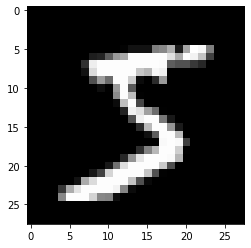

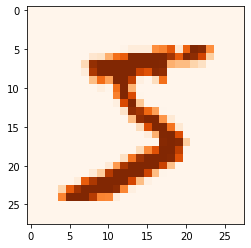

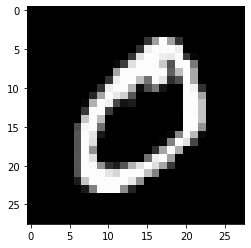

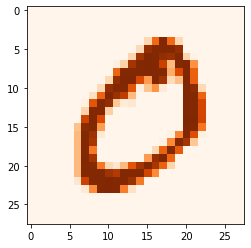

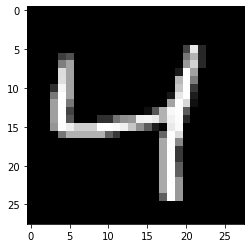

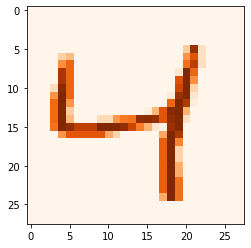

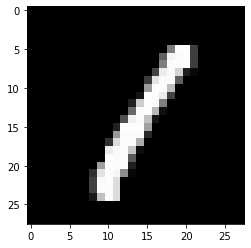

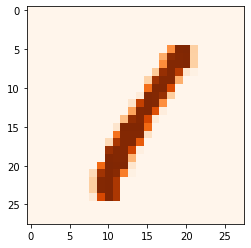

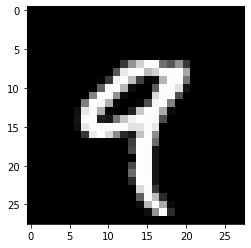

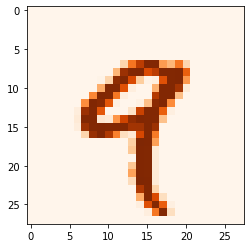

In [2]:
import matplotlib.pyplot as plt
# Display the data for index in range(len(x_train)):
for index in range(0,5):
  plt.imshow(x_train[index], cmap=plt.get_cmap('gray'))
  plt.show()
  plt.imshow(x_train[index], cmap=plt.get_cmap('Oranges'))
  plt.show()

Prepare for Training

In [3]:
#Reshape to add 4th dimension for Keras
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_train /= 255
print(x_train.shape)
print(x_train.size)
print(x_train.data)

x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_test = x_test.astype('float32')
x_test /= 255
print(x_test.shape)
print(x_test.size)
print(x_test.data)

input_shape = (img_rows, img_cols, 1)

(60000, 28, 28, 1)
47040000
(10000, 28, 28, 1)
7840000


Hot One Encoding


In [4]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(y_test.shape[1])

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

y_train[0]

10


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Build Model 

In [5]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD

model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'] )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dropout (Dropout)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                92170     
Total params: 129,738
Trainable params: 129,738
Non-trainable params: 0
__________________________________________________

Model Training 

In [9]:
batch_size = 64
epochs = 5

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
938/938 [==============================] - 232s 247ms/step - loss: 0.3578 - accuracy: 0.8925 - val_loss: 0.2750 - val_accuracy: 0.9198
Epoch 2/5
938/938 [==============================] - 233s 248ms/step - loss: 0.2860 - accuracy: 0.9156 - val_loss: 0.2043 - val_accuracy: 0.9422
Epoch 3/5
938/938 [==============================] - 232s 248ms/step - loss: 0.2152 - accuracy: 0.9376 - val_loss: 0.1482 - val_accuracy: 0.9586
Epoch 4/5
938/938 [==============================] - 233s 248ms/step - loss: 0.1672 - accuracy: 0.9515 - val_loss: 0.1192 - val_accuracy: 0.9646
Epoch 5/5
938/938 [==============================] - 232s 248ms/step - loss: 0.1375 - accuracy: 0.9603 - val_loss: 0.0940 - val_accuracy: 0.9725


Model Testing

In [10]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 0.09397300332784653
Test Accuracy: 0.9725000262260437


Plotting Loss

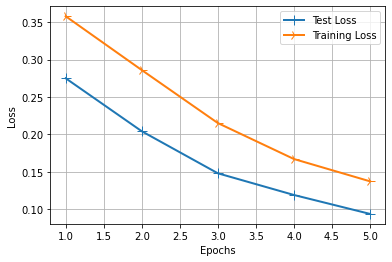

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs, val_loss_values, label='Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.grid(True)
plt.legend()
plt.show()

Plotting Accuracy

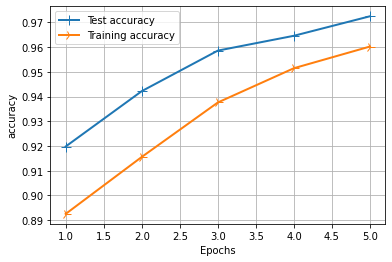

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs, val_loss_values, label='Test accuracy')
line2 = plt.plot(epochs, loss_values, label='Training accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)

plt.xlabel('Epochs')
plt.ylabel('accuracy')

plt.grid(True)
plt.legend()
plt.show()

Save the Model


In [14]:
modelFileName = 'mnist_cnn_5_epochs.h5'
model.save(modelFileName)
print('Model Saved!')

Model Saved!


Load the Model

In [16]:
from keras.models import load_model
classifier = load_model(modelFileName)



Input Testing

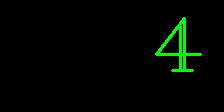

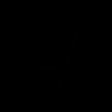

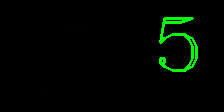

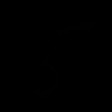

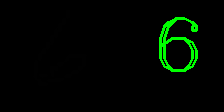

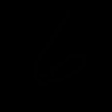

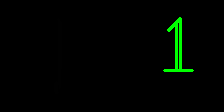

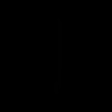

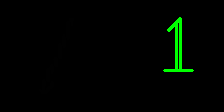

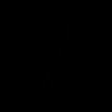

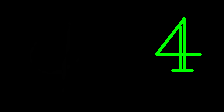

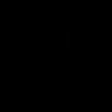

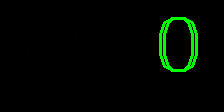

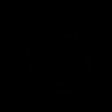

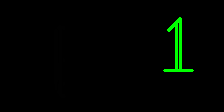

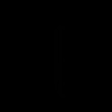

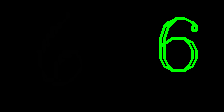

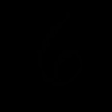

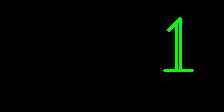

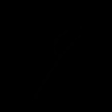

In [21]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2_imshow(expanded_image)
    cv2_imshow(input_im)

for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1) 
    
    ## Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])

    draw_test("Prediction", res, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

Model Diagram

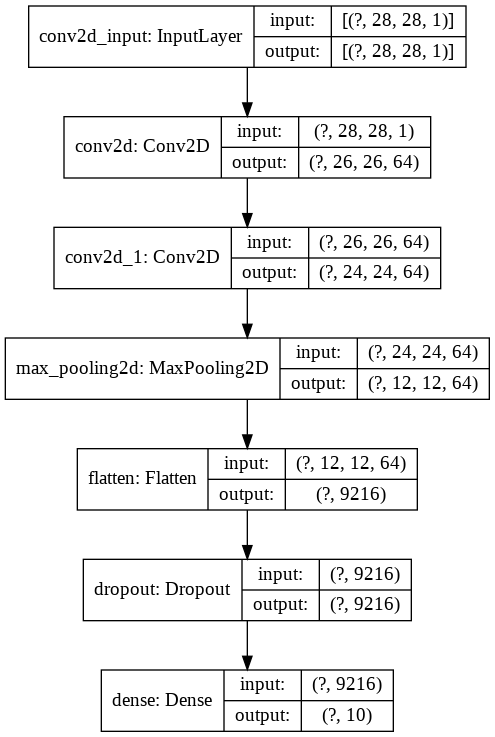

In [23]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='mnist_classifier_model_diagram.png', show_shapes = True, show_layer_names= True)
